Import Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

Importing Datasets

In [2]:
path=r'/Users/charlesrhodes/Documents'

In [3]:
df_original = pd.read_pickle(os.path.join(path,'df_original.pkl'))

In [4]:
df = pd.read_pickle(os.path.join(path,'df_62.pkl'))

In [5]:
df_years = pd.read_pickle(os.path.join(path,'6point5years.pkl'))

In [6]:
df_original.head()

,country_name,country_code,region,income_group,income_group_num,num_of_years,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Latin America & Caribbean,High income,4,35,,,,,...,-1.833977,5.635318,-0.709567,2.885166,1.515938,4.917139,4.738331,0.181216,-18.698325,17.2253
1,Afghanistan,AFG,South Asia,Low income,1,19,,,,,...,8.247144,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.965296
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,2,41,,,,,...,4.536024,1.101887,1.028262,-2.64642,-6.011783,-3.633446,-4.676622,-4.014917,-8.635446,-2.050717
3,Albania,ALB,Europe & Central Asia,Upper middle income,3,41,,,,,...,1.584873,1.187234,1.985388,2.516827,3.480293,3.897741,4.276326,2.523894,-2.925821,9.526027
4,Andorra,AND,Europe & Central Asia,High income,4,50,0.997233,0.890677,-0.920696,-5.412483,...,-5.571256,-4.026027,2.140939,1.257416,2.574505,-1.416579,-0.00387,0.238297,-12.735078,7.110481


In [7]:
df_original.shape

(211, 56)

In [8]:
df.head()

,country_name,country_code,region,income_group,income_group_num,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,Andorra,AND,Europe & Central Asia,High income,4,0.997233,0.890677,-0.920696,-5.412483,-2.528959,...,-5.571256,-4.026027,2.140939,1.257416,2.574505,-1.416579,-0.003870,0.238297,-12.735078,7.110481
6,Argentina,ARG,Latin America & Caribbean,Upper middle income,3,0.020487,1.136093,3.754160,-1.673528,-3.563802,...,-2.145284,1.265685,-3.578581,1.629664,-3.110064,1.757648,-3.601610,-2.969563,-10.812611,9.357176
10,Australia,AUS,East Asia & Pacific,High income,4,2.017709,1.062445,1.504868,0.096321,1.565296,...,2.103808,0.828326,1.060337,0.693066,1.138424,0.604963,1.348283,0.665151,-1.278358,2.105711
11,Austria,AUT,Europe & Central Asia,High income,4,5.592381,4.310906,3.765373,-0.099030,4.763370,...,0.222451,-0.562299,-0.122371,-0.111540,0.892469,1.550724,1.927713,1.066970,-6.841545,4.102317
13,Burundi,BDI,Sub-Saharan Africa,Low income,1,-6.328784,7.120849,-3.129500,-1.697838,5.641818,...,0.824081,1.263599,0.810603,-5.980495,-2.206134,-1.772646,-1.377140,-1.457193,-2.508461,-0.889127


In [9]:
df.shape

(110, 55)

In [10]:
df_years.head()

,country_name,country_code,region,income_group,income_group_num,year,gdp_growth_percent
0,Andorra,AND,Europe & Central Asia,High income,4,1972,0.997233297436878
1,Argentina,ARG,Latin America & Caribbean,Upper middle income,3,1972,0.0204873323872619
2,Australia,AUS,East Asia & Pacific,High income,4,1972,2.0177089085017
3,Austria,AUT,Europe & Central Asia,High income,4,1972,5.59238153081114
4,Burundi,BDI,Sub-Saharan Africa,Low income,1,1972,-6.32878360513878


In [11]:
df_years.shape

(5500, 7)

Subset

In [132]:
# Adding in a dataset with the Average GDP for each year
dataframe = pd.DataFrame({'Year': [
1972, 
1973, 
1974, 
1975, 
1976, 
1977, 
1978, 
1979, 
1980, 
1981, 
1982, 
1983, 
1984, 
1985, 
1986, 
1987, 
1988, 
1989, 
1990, 
1991, 
1992, 
1993, 
1994, 
1995, 
1996, 
1997, 
1998, 
1999, 
2000, 
2001, 
2002, 
2003, 
2004, 
2005, 
2006, 
2007, 
2008, 
2009, 
2010, 
2011, 
2012, 
2013, 
2014, 
2015, 
2016, 
2017, 
2018, 
2019, 
2020, 
2021], 
'Average GDP Growth Percent': [
3.30150449560013, 
3.06767776172913, 
3.36037901028717, 
0.682553123774646, 
3.72137341391272, 
2.17044631911168, 
2.54132782190401, 
2.0033533491584, 
0.947496760206987, 
1.13336492007588, 
-0.539015751638902, 
-0.815419678664643, 
1.27896237508765, 
1.11882985225117, 
1.40268063238057, 
0.995867986420063, 
2.08861033388455, 
1.49502275960942, 
1.39346404807583, 
0.357743483831388, 
0.522631555718757, 
0.379037071565378, 
0.9447932196857, 
2.55803188048912, 
2.59653382803144, 
2.84544427702058, 
1.36952805209947, 
1.5820150372282, 
2.31268171435845, 
1.02171461976172, 
1.12562239039236, 
1.88178147580151, 
3.60181716337775, 
2.77087793919334, 
3.5232925396483, 
3.29289181220566, 
1.35027548461201, 
-1.01399717241114, 
3.17684299104443, 
2.1730776602456, 
1.9848639458895, 
1.78462719004189, 
2.19439519368991, 
1.65924133607891, 
1.39480240222895, 
1.73859542048692, 
1.6764109049308, 
1.15702395923566, 
-5.36936748440443, 
4.28362907343635]})

In [133]:
dataframe.dtypes

Year                            int64
Average GDP Growth Percent    float64
dtype: object

In [134]:
dataframe

,Year,Average GDP Growth Percent
0,1972,3.301504
1,1973,3.067678
2,1974,3.360379
3,1975,0.682553
4,1976,3.721373
5,1977,2.170446
6,1978,2.541328
7,1979,2.003353
8,1980,0.947497
9,1981,1.133365


In [135]:
dataframe.shape

(50, 2)

In [136]:
dataframe.head()

,Year,Average GDP Growth Percent
0,1972,3.301504
1,1973,3.067678
2,1974,3.360379
3,1975,0.682553
4,1976,3.721373


In [116]:
# The reason I chose to split the data this way is it has a clear time component and an output for each time period (year).

Line Chart

In [137]:
data = dataframe.groupby('Year').agg({'Average GDP Growth Percent': ['mean']})

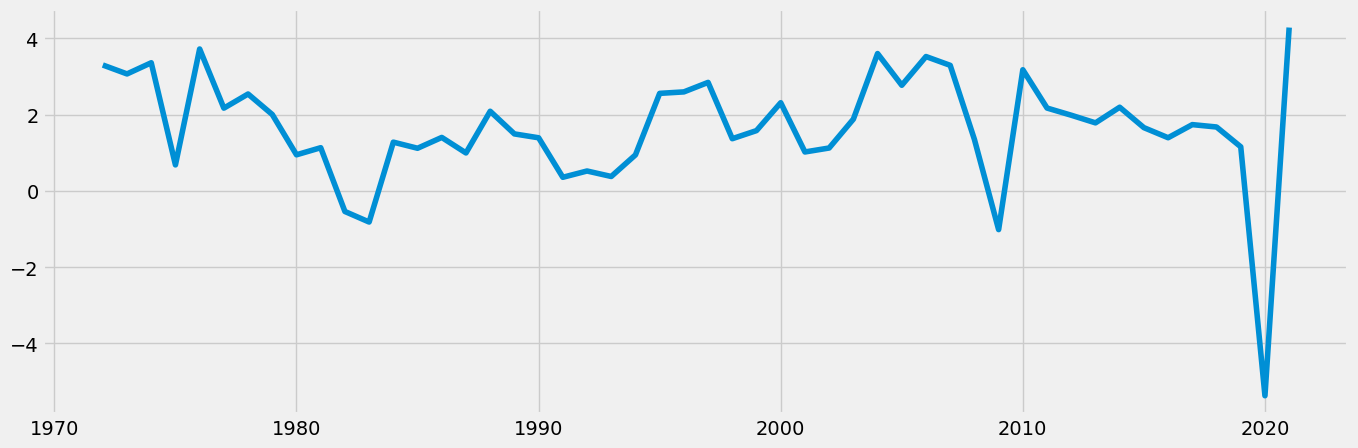

In [138]:
plt.figure(figsize=(15,5), dpi=100,)
plt.plot(data)

In [139]:
dataframe.columns

Index(['Year', 'Average GDP Growth Percent'], dtype='object')

In [157]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

Decomposing

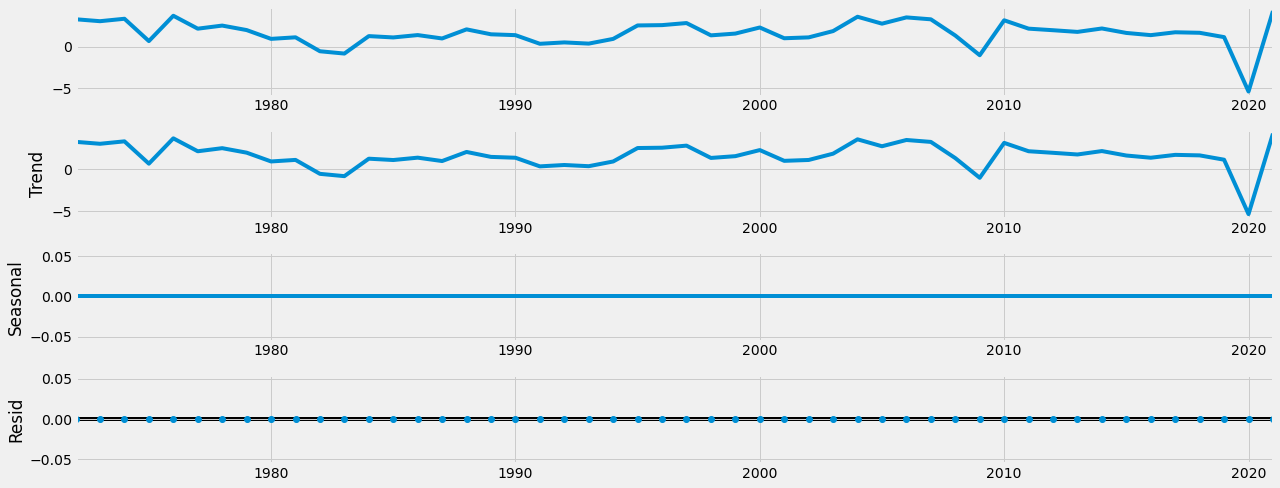

In [196]:
decomp = sm.tsa.seasonal_decompose(data, model='additive', period=1)
decomp.plot()
plt.show()

In [197]:
#The decomposition trend shows the similar data to the line chart, with no seasonality or resid.

Dickey-Fuller Test

In [198]:
from statsmodels.tsa.stattools import adfuller 

In [202]:
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
dickey_fuller(data['Average GDP Growth Percent'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.381122e+00
p-value                        2.221051e-08
Number of Lags Used            0.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64


In [203]:
#The test statistic -6.381122 is lower than the critical value score of -2.922629, rejecting the null hypothesis.

Autocorrelation Test

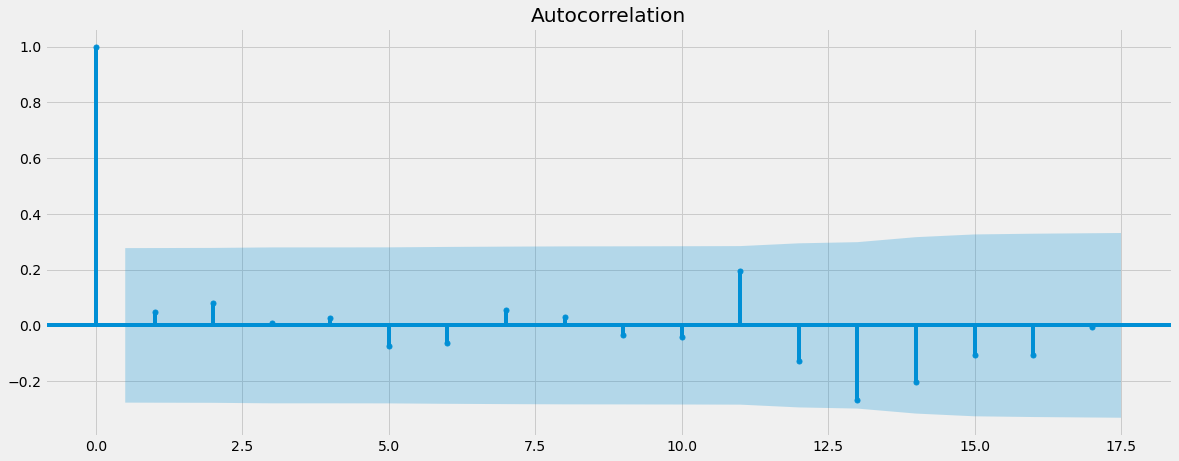

In [204]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

In [205]:
#The test shows one time at the beginning, that the blue lines exceed the bounds of the confidence interval.

In [207]:
#The data is stationary, therefore the differencing is unneccesary.